### Importing the libraries

In [464]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn as sk
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import warnings
import keras
import seaborn as sns
import os

### Importing the datasets

In [257]:
details = pd.read_csv('commodityID_and_details.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
wpi_inf = pd.read_csv('wpi_and_inflation.csv')
sample = pd.read_csv('sample_submission.csv')

### Data Pre Processing

In [258]:
details.head(4)

,CommodityID,Commodity_name
0,CD1,Paddy
1,CD2,Wheat
2,CD3,Jowar
3,CD4,Pearl millet


### All datasets are viewed

In [259]:
train.head(4)

,Month-year,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
0,2020-06-01,CD117,42.65,Moderate,No,Low,68577.0,0,1,4407.0,6144
1,2013-10-01,CD71,93.96,Abundant,Yes,Short-run,12263.0,0,1,291.0,6564
2,2017-01-01,CD101,49.28,Moderate,No,Long-run,34924.0,0,1,1973.0,2440
3,2016-07-01,CD132,61.08,Moderate,No,Long-run,92940.0,1,0,782.0,1546


In [260]:
train['Month-year'].min(), train['Month-year'].max()

('2012-01-01', '2020-12-01')

In [261]:
train = train.sort_values('CommodityID')

In [262]:
labels = list(set(train['CommodityID']))

In [263]:
a = labels.copy()

In [264]:
for i in range(len(labels)):
    labels[i] = train[train['CommodityID'] == str(labels[i])]
    labels[i].rename(columns = {'Minimum support price (in Rs./Quintal)':'MSP'}, inplace = True)

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [265]:
for i in range(len(labels)):
    labels[i] = labels[i].groupby('Month-year')['MSP'].mean().reset_index()
    
    

In [266]:
new_test = pd.merge(test, details)

In [267]:
labels[1]

,Month-year,MSP
0,2012-04-01,2791.0
1,2012-05-01,7654.0
2,2012-09-01,6116.0
3,2012-10-01,6695.0
4,2012-12-01,6207.0
5,2013-06-01,6973.0
6,2013-08-01,1932.0
7,2013-12-01,4492.5
8,2014-03-01,5122.0
9,2014-07-01,2697.0


In [268]:
for i in range(len(labels)):
    labels[i]['Month-year'] = pd.to_datetime(labels[i]['Month-year'], format='%Y-%m-%d')
    labels[i] = labels[i].set_index('Month-year')
    labels[i] = labels[i]['MSP'].resample('D').mean()

In [270]:
labels[1].head(10)

Month-year
2012-04-01    2791.0
2012-04-02       NaN
2012-04-03       NaN
2012-04-04       NaN
2012-04-05       NaN
2012-04-06       NaN
2012-04-07       NaN
2012-04-08       NaN
2012-04-09       NaN
2012-04-10       NaN
Freq: D, Name: MSP, dtype: float64

In [271]:
for i in range(len(labels)):
    labels[i] = labels[i].interpolate()

In [272]:
labels[1]

Month-year
2012-04-01    2791.0
2012-04-02    2953.1
2012-04-03    3115.2
2012-04-04    3277.3
2012-04-05    3439.4
               ...  
2020-11-27    4949.2
2020-11-28    4982.4
2020-11-29    5015.6
2020-11-30    5048.8
2020-12-01    5082.0
Freq: D, Name: MSP, Length: 3167, dtype: float64

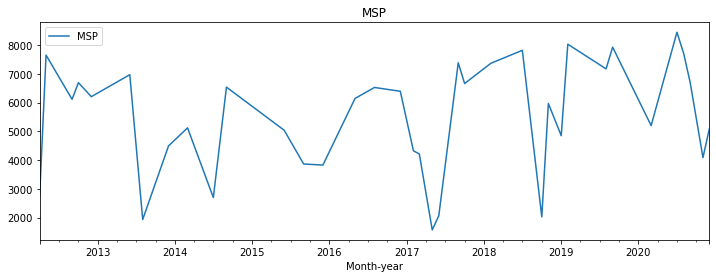

In [273]:
labels[1].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('MSP')
plt.show(block=False)

In [274]:
a

['CD68',
 'CD98',
 'CD4',
 'CD92',
 'CD66',
 'CD74',
 'CD111',
 'CD26',
 'CD99',
 'CD137',
 'CD19',
 'CD53',
 'CD91',
 'CD36',
 'CD103',
 'CD78',
 'CD123',
 'CD35',
 'CD41',
 'CD48',
 'CD77',
 'CD136',
 'CD23',
 'CD10',
 'CD116',
 'CD119',
 'CD112',
 'CD18',
 'CD65',
 'CD33',
 'CD70',
 'CD54',
 'CD110',
 'CD128',
 'CD75',
 'CD83',
 'CD57',
 'CD50',
 'CD25',
 'CD131',
 'CD126',
 'CD97',
 'CD40',
 'CD14',
 'CD124',
 'CD2',
 'CD31',
 'CD60',
 'CD20',
 'CD39',
 'CD86',
 'CD89',
 'CD132',
 'CD79',
 'CD105',
 'CD21',
 'CD34',
 'CD142',
 'CD55',
 'CD9',
 'CD133',
 'CD69',
 'CD30',
 'CD87',
 'CD38',
 'CD135',
 'CD51',
 'CD6',
 'CD118',
 'CD76',
 'CD64',
 'CD42',
 'CD102',
 'CD100',
 'CD72',
 'CD81',
 'CD1',
 'CD85',
 'CD17',
 'CD3',
 'CD12',
 'CD24',
 'CD106',
 'CD94',
 'CD46',
 'CD121',
 'CD13',
 'CD96',
 'CD5',
 'CD129',
 'CD44',
 'CD101',
 'CD56',
 'CD67',
 'CD49',
 'CD122',
 'CD52',
 'CD130',
 'CD114',
 'CD8',
 'CD113',
 'CD134',
 'CD29',
 'CD93',
 'CD63',
 'CD11',
 'CD45',
 'CD22',
 'CD95

In [275]:
test['Month-year'].min(), test['Month-year'].max()

('2020-01-01', '2021-12-25')

In [289]:
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [301]:
new_test.head(4)

,Month-year,Commodity_name,CommodityID
0,2020-03-02,Tomato,CD18
1,2021-05-20,Radish,CD24
2,2020-10-27,Spray Chrysanthemum,CD134
3,2021-12-22,Brinjal,CD20


In [302]:
d = new_test['CommodityID']

In [303]:
for i in range(len(d)):
    for j in range(len(a)):
        if d[i] == a[j]:
            insider_list.append(int(j))
        else:
            pass

In [304]:
insider_list

[27,
 81,
 101,
 48,
 130,
 116,
 25,
 80,
 54,
 102,
 24,
 118,
 68,
 43,
 49,
 36,
 20,
 40,
 60,
 73,
 120,
 12,
 94,
 19,
 67,
 61,
 88,
 64,
 41,
 123,
 28,
 127,
 37,
 51,
 140,
 15,
 58,
 65,
 23,
 98,
 82,
 133,
 100,
 63,
 110,
 93,
 76,
 17,
 128,
 10,
 108,
 115,
 91,
 138,
 8,
 6,
 132,
 66,
 114,
 22,
 135,
 85,
 34,
 1,
 111,
 29,
 35,
 16,
 109]

In [438]:
MSP =[]

In [ ]:
test['Month-year'].min(), test['Month-year'].max()

In [439]:
for key in insider_list:
    arima_model = ARIMA(labels[key],order=(5,2,1)).fit(transparams=False)
    g = arima_model.predict("2020-01-01","2021-12-25", typ ='levels')
    h = str(g)
    j = h.split('   ')[0]
    for i in range(len(new_test)):
        if new_test['Month-year'][i] == j:
            h = h.split('   ')[1]
            h = h.split('\n')[0]
            h.lstrip()
            MSP.append(h)

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

ValueError: Length of passed values is 877, index implies 725.

In [440]:
MSP

[' 1609.422901',
 '  5820.767560',
 '  5656.677861',
 '  5453.352493',
 '  3795.476688',
 '  6861.276556',
 ' 4723.003640',
 '  4561.188364',
 ' 7112.540533',
 '  4444.828145',
 '  3283.550224',
 '  6169.005881',
 ' 7796.017593',
 ' 4165.795069',
 ' 3696.005403',
 ' 2349.710672',
 '  7662.728108',
 '  3297.307048',
 ' 3390.533162',
 '  4501.532881',
 ' 6941.486245',
 '  5727.591222',
 '  1391.080801',
 '  5436.053063',
 '  5882.106991',
 '  6584.584214',
 ' 7313.739767',
 '  4421.068941',
 '  4352.039838',
 ' 6684.006456',
 ' 7832.159463',
 '  4939.920089',
 '  2566.394846',
 ' 4180.439725',
 '  4153.459633',
 '  4584.012985',
 '  6394.883434',
 ' 4652.971288',
 '  3631.303172',
 ' 6588.504721',
 '  5168.997576',
 ' 2008.248415',
 ' 6926.830910',
 ' 7154.654009',
 '  4873.905145',
 ' 6076.333332',
 ' 4003.539494',
 '  8489.975132',
 '  3412.048828']

In [443]:
for i in range(len(MSP)):
    MSP[i] = MSP[i].lstrip()

In [444]:
MSP

['1609.422901',
 '5820.767560',
 '5656.677861',
 '5453.352493',
 '3795.476688',
 '6861.276556',
 '4723.003640',
 '4561.188364',
 '7112.540533',
 '4444.828145',
 '3283.550224',
 '6169.005881',
 '7796.017593',
 '4165.795069',
 '3696.005403',
 '2349.710672',
 '7662.728108',
 '3297.307048',
 '3390.533162',
 '4501.532881',
 '6941.486245',
 '5727.591222',
 '1391.080801',
 '5436.053063',
 '5882.106991',
 '6584.584214',
 '7313.739767',
 '4421.068941',
 '4352.039838',
 '6684.006456',
 '7832.159463',
 '4939.920089',
 '2566.394846',
 '4180.439725',
 '4153.459633',
 '4584.012985',
 '6394.883434',
 '4652.971288',
 '3631.303172',
 '6588.504721',
 '5168.997576',
 '2008.248415',
 '6926.830910',
 '7154.654009',
 '4873.905145',
 '6076.333332',
 '4003.539494',
 '8489.975132',
 '3412.048828']

In [445]:
test

,Month-year,Commodity_name
0,2020-03-02,Tomato
1,2021-05-20,Radish
2,2020-10-27,Spray Chrysanthemum
3,2021-12-22,Brinjal
4,2021-10-14,Ginger
...,...,...
64,2021-03-22,Papaya
65,2020-09-06,Apple
66,2021-07-13,Sunflower
67,2021-08-01,Lily


In [450]:
for key in range(49,69):
    arima_model = ARIMA(labels[key],order=(5,2,1)).fit(transparams=False)
    g = arima_model.predict("2020-01-01","2021-12-25", typ ='levels')
    h = str(g)
    j = h.split('   ')[0]
    for i in range(len(new_test)):
        if new_test['Month-year'][i] == j:
            h = h.split('   ')[1]
            h = h.split('\n')[0]
            h.lstrip()
            z.append(h)

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or c

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/iknott/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

In [446]:
sample.head(5)

,Month-year,Commodity_name,Minimum support price (in Rs./Quintal)
0,2020-06-01,Paddy,6144
1,2013-10-01,Wheat,6564
2,2017-01-01,Jowar,2440
3,2016-07-01,Pearl millet,1546
4,2014-04-01,Maize,8749


In [448]:
len(MSP)

49

In [449]:
z =[]

In [452]:
for i in range(len(z)):
    z[i] = z[i].lstrip()

In [454]:
len(z)

20

In [453]:
z

['3696.005403',
 '4522.378415',
 '4180.439725',
 '2577.044451',
 '3953.988937',
 '7112.540533',
 '6877.290631',
 '7123.026997',
 '3879.201222',
 '6394.883434',
 '2934.760348',
 '3390.533162',
 '6584.584214',
 '5646.525326',
 '7154.654009',
 '4421.068941',
 '4652.971288',
 '4918.637161',
 '5882.106991',
 '7796.017593']

In [455]:
list1 = MSP
list2 = z

for x in list2:
  list1.append(x)

In [456]:
list1

['1609.422901',
 '5820.767560',
 '5656.677861',
 '5453.352493',
 '3795.476688',
 '6861.276556',
 '4723.003640',
 '4561.188364',
 '7112.540533',
 '4444.828145',
 '3283.550224',
 '6169.005881',
 '7796.017593',
 '4165.795069',
 '3696.005403',
 '2349.710672',
 '7662.728108',
 '3297.307048',
 '3390.533162',
 '4501.532881',
 '6941.486245',
 '5727.591222',
 '1391.080801',
 '5436.053063',
 '5882.106991',
 '6584.584214',
 '7313.739767',
 '4421.068941',
 '4352.039838',
 '6684.006456',
 '7832.159463',
 '4939.920089',
 '2566.394846',
 '4180.439725',
 '4153.459633',
 '4584.012985',
 '6394.883434',
 '4652.971288',
 '3631.303172',
 '6588.504721',
 '5168.997576',
 '2008.248415',
 '6926.830910',
 '7154.654009',
 '4873.905145',
 '6076.333332',
 '4003.539494',
 '8489.975132',
 '3412.048828',
 '3696.005403',
 '4522.378415',
 '4180.439725',
 '2577.044451',
 '3953.988937',
 '7112.540533',
 '6877.290631',
 '7123.026997',
 '3879.201222',
 '6394.883434',
 '2934.760348',
 '3390.533162',
 '6584.584214',
 '5646.5

In [457]:
len(list1)

69

In [458]:
test['Minimum support price (in Rs./Quintal)'] = list1

In [460]:
test.head(4)

,Month-year,Commodity_name,Minimum support price (in Rs./Quintal)
0,2020-03-02,Tomato,1609.422901
1,2021-05-20,Radish,5820.767560
2,2020-10-27,Spray Chrysanthemum,5656.677861
3,2021-12-22,Brinjal,5453.352493


In [466]:
test.to_csv("data.csv", index = False)